# Arbres AVL

*Complexités temporelles et spatiales*

Les opérations les plus importantes - insertion, suppression, recherche - ont une complexité temporelle en $\Theta(h)$ avec $h$ la hauteur de l'arbre. 

Il est donc essentielle de calculer cette hauteur $h$ en fonction du nombre $n$ stockés dans l'arbre. 

## Meilleur cas 

Calculons $S_{max}(h)$, le nombre maximum d'éléments que l'on peut stocké dans un arbre AVL de hauteur $h$. 

On se souvient de la formule générale permettant de calculer le nombre d'élément dans un arbre à partir de ce nombre pour les sous-arbres gauche et droit. 

`S(R) = S(R.gauche) + S(R.droite) + 1`

Dans le meilleur cas, l'arbre doit être parfaitement équilibré en tous ses noeuds. On a donc une hauteur $h-1$ pour les sous-arbres gauche et droit, et donc 

$S_{max}(h) = S_{max}(h-1) + S_{max}(h-1) + 1 = 2 \cdot S_{max}(h-1) + 1$ 

ce qui donne 

$S_{max}(h) = 2^h - 1$

Par exemple, l'arbre AVL de hauteur 4 peut contenir jusqu'à $2^4-1 = 15$ éléments.

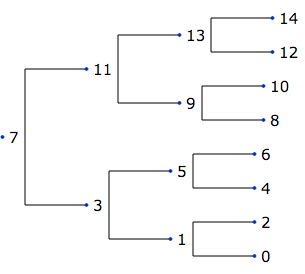

In [2]:
import include.helpers as h
h.afficher_arbre_binaire(h.meilleurs_cas_AVL())

## Pire cas

Dans le pire des cas, l'arbre doit être déséquilibré de $\pm1$ en chaque noeud. Les sous-arbres gauche et droit d'un arbre de hauteur $h$ ont donc une hauteur $h-1$ et $h-2$ respectivement. 

$S_{min}(h) = S_{min}(h-1) + S_{min}(h-2) + 1$

avec $S_{min}(0) = 0$ et $S_{min}(1) = 1$

Obvervons les premières valeurs de cette suite

In [8]:
def Smin(h):
    if h < 2: 
        return h
    else:
        return Smin(h-1)+Smin(h-2)+1

In [9]:
for i in range(10): print(Smin(i), end = " ")

0 1 2 4 7 12 20 33 54 88 

Par exemple, dans le pire cas, un arbre AVL de hauteur 4 contient le minimum de 7 éléments.

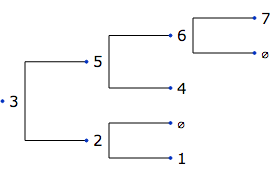

In [3]:
h.afficher_arbre_binaire(R = h.pire_cas_AVL())

La similitude avec la suite de Fibonacci est frappante. Notons que comme pour la suite de Fibonacci, la mise en oeuvre doublement récursive de la fonction `Smin(h)` ci-dessus est de complexité exponentielle. On peut faire mieux:

* complexité linéaire en l'écrivant itérativement


* complexité logarithmique et utilisant le produit matriciel et la multiplication russe pour calculer l'exposant $h$. 

Mais il n'est pas nécessaire d'écrire une fonction spécifique. En effet, on note que la solution est 

$S_{min}(h) = F(h+1) - 1$ 

avec $F(i)$ le $i^{eme}$ nombre de Fibonacci. 

Le comportement asymptotique est donc le même que celui de la suite de Fibonacci. $S_{min}(h) \approx \phi^h$ avec $\phi = \frac{1 + \sqrt{5}}{2} \approx 1.618$, le nombre d'or.  

Pour un nombre d'éléments $n$ donné, la profondeur maximale $h(n)$ d'un arbre AVL est donc bornée par 

$ \log_2(n) < h(n) < log_\phi(n) $

La complexité temporelle de toutes les opérations est donc logarithmique. 

## Complexité spatiale

Pour mettre en oeuvre l'équilibrage AVL, nous avons stocké en chaque noeud la hauteur du sous-arbre dont il est la racine. 

Si l'on code cette hauteur sur $b$ bits, on couvre toutes les valeurs de $0$ à $2^{b}-1$. 

Réciproquement, pour pouvoir stocker une hauteur $h$, on a besoin de $\log_2(h)$ bits. 

Pour un arbre AVL de $n$ éléments, il faut donc de l'ordre de $\log \log n$ bits par élément, ce qui donne une complexité spatialle quasi-linéaire $\Theta(n \log\log n)$

En pratique, en utilisant un octet pour stocker cette hauteur, on peut stocker $S_{min}(255)$ éléments, ce qui sera toujours suffisant. 

In [25]:
def Smin(h):
    s0 = 0; s1 = 1
    for i in range(2,h+1):
        si = s0 + s1 + 1
        s0 = s1
        s1 = si
    return si

print(Smin(255))

229265413057075367692743352179590077832064383222590236


## Complexité spatiale linéaire

Si un octet par élément est excessif, il est possible de n'utiliser que 2 bits par élément en ne stockant pas les hauteurs mais les déséquilibres. 

Il est même possible de n'utiliser qu'un seul bit en délégant le calcul du déséquilibre aux enfants. Le bit indique alors si un noeud est plus petit que son frère. 

Le retour de récursion doit alors indiquer au parent si la hauteur de l'enfant a été modifiée de $\pm 1$ ou pas pour lui permettre de mettre à jour son déséquilibre. 

Le code est un peu [plus complexe à écrire](https://en.wikipedia.org/wiki/AVL_tree). Il est plus simple d'écrire séparément l'équilibrage après insertion et l'équilibrage après suppression. 

<table style="width: 100%; border: 0px">
<tr style="background-color:white; border:0px">
<td style="width: 120px; border: 0px">
    <img src="https://heig-vd.ch/ResourcePackages/WhiteFox/assets/images/logo-heig-vd.svg" height=200px align=left >
    </td>
    <td style="vertical-align: middle; border: 0px" height=200px>
    <p style="text-align: left">
        <a href="https://ocuisenaire.github.io/ASD1-notebooks/">ASD1 Notebooks on GitHub.io</a>
 </p>        
<p style="text-align: left">
© Olivier Cuisenaire, 2018 </p>
</td>
</tr>
</table>